In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<Figure size 900x900 with 0 Axes>

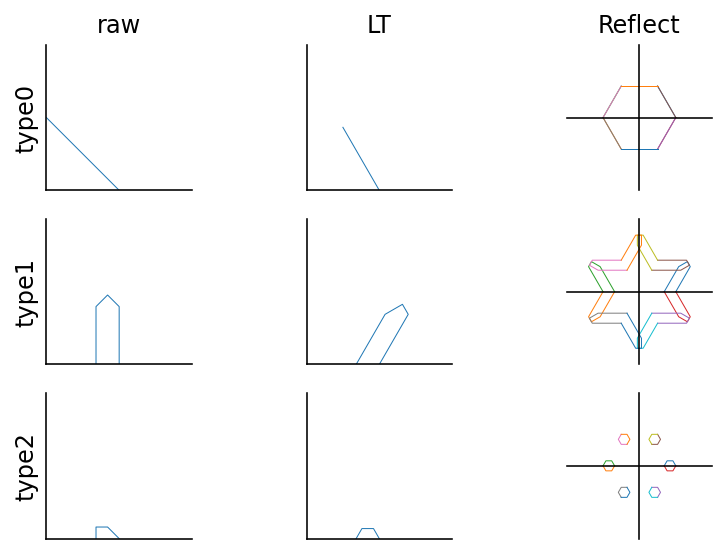

In [57]:
plt.figure(figsize=(3,3),dpi=300)

# parameters of a polyline
x = np.random.randint(10,342)
w = np.random.randint(1,100)
h = np.random.randint(1,100)

# set axes
def set_axes(axs):
    plt.setp(axs.flat,xticks=[],yticks=[])
    for t in range(3):
        for i in range(3):
                if (i<2):
                    axs[t,i].set_xlim(min(0,1.1*(x-w)),max(x+w,h+w,x+h,2*x))
                    axs[t,i].set_ylim(min(0,1.1*(x-w)),max(x+w,h+w,x+h,2*x))
                else:
                    size = max(x+w,h+w,x+h,2*x)
                    axs[t,i].set_xlim(-size,size)
                    axs[t,i].set_ylim(-size,size)
                axs[t,i].set_aspect(1)
                axs[t,i].spines['right'].set_color('none')
                axs[t,i].spines['top'].set_color('none')
                axs[t,i].spines['left'].set_position(('data',0))
                axs[t,i].spines['bottom'].set_position(('data',0))
                # axs[i].grid(which='major')

rotate = [[1, 0, 0, 1], [-1, 0, 0, -1],
          [-1, 0, 0, 1], [1, 0, 0, -1],
          [0.5, 0.866025404, -0.866025404, 0.5], [0.5,0.866025404, 0.866025404, -0.5],
          [-0.5, -0.866025404, 0.866025404, -0.5], [-0.5, -0.866025404, -0.866025404, 0.5],
          [0.5, -0.866025404, 0.866025404, 0.5], [0.5, -0.866025404, -0.866025404, -0.5],
          [-0.5, 0.866025404, -0.866025404, -0.5], [-0.5, 0.866025404, 0.866025404, 0.5]
          ]

#
def linear_transform(x_list,y_list,matA):
    points = np.mat(list(zip(x_list,y_list))).transpose()
    result=matA.dot(points).tolist()
    return result[0],result[1]


# plot
fig, axs = plt.subplots(3,3)

set_axes(axs)
for t in range(3):
    if(t==1):
        x_points = [x,x,x-w//2,x-w,x-w]
        y_points = [0,h,h+w//2,h,0]
    elif(t==2):
        x_points = [x,x-h%w,x-w,x-w]
        y_points = [0,h%w,h%w,0]
    else:
        x_points = [x,0]
        y_points = [0,x]


    axs[t,0].plot(x_points,y_points,linewidth=0.5)
    x_points, y_points = linear_transform(x_points,y_points,np.mat([[1,0.5],[0,0.866025404]]))
    axs[t,1].plot(x_points,y_points,linewidth=0.5)
    for matA in rotate:
        x_polyline, y_polyline = linear_transform(x_points,y_points,np.mat(matA).reshape(2,2))
        axs[t,2].plot(x_polyline,y_polyline,linewidth=0.5)

# Label rows and columns
for ax, step in zip(axs[0], ['raw', 'LT','Reflect']):
    ax.set_title('{0}'.format(step), size=12)
for ax, polyline_type in zip(axs[:, 0], ['type0', 'type1', 'type2']):
    ax.set_ylabel(polyline_type, size=12)

        
plt.tight_layout()
plt.savefig('illustation.svg',dpi=300,format='svg')
plt.show()
